<h1>Importacion de librerias necesarias para el desarrollo del modelo</h1>

In [83]:
# Manipulacion de datos
import pandas as pd
import numpy as np
import math
from tqdm import tqdm
import optbinning
from sklearn.preprocessing import OrdinalEncoder

#Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import joblib

#Preprocesamiento
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, model_selection, linear_model
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.metrics import roc_curve, auc

#Estilo de las graficas
sns.set_style('whitegrid')

In [84]:
# Carga de datos
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [85]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [86]:
# Tamaño del dataset
df.shape

(32581, 12)

In [87]:
#informacion general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Queremos borrar los valores NA o nulos en la base de datos para eso primero tenemos que ver cuantos datos NA hay.

In [88]:
#conteo de valores nulos
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [89]:
#Eliminar filas con valores nulos y verificar
df = df.dropna().reset_index(drop=True)
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [90]:
#conteo de valores unicos
df.nunique()

person_age                      57
person_income                 3835
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      728
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [91]:
#Estadisticos descriptivos para variables numericas
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [92]:
#Estadisticos descriptivos para variables categoricas
df.describe(include=['object'])

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,28638,28638,28638,28638
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,14551,5704,9402,23535


In [93]:
#Verificar si hay valores duplicados
df.duplicated().sum()

137

### Una vez revisado datos unicos buscamos eliminar datos duplicados en la base de datos

In [94]:
#Eliminar valores duplicados
df.drop_duplicates(inplace=True)

In [95]:
#Verificar que se eliminaron los valores duplicados
df.shape

(28501, 12)


### Revisamos como se distribuyen los datos númericos para ver si encontramos algún posible outlier a traves de sus graficas.

c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


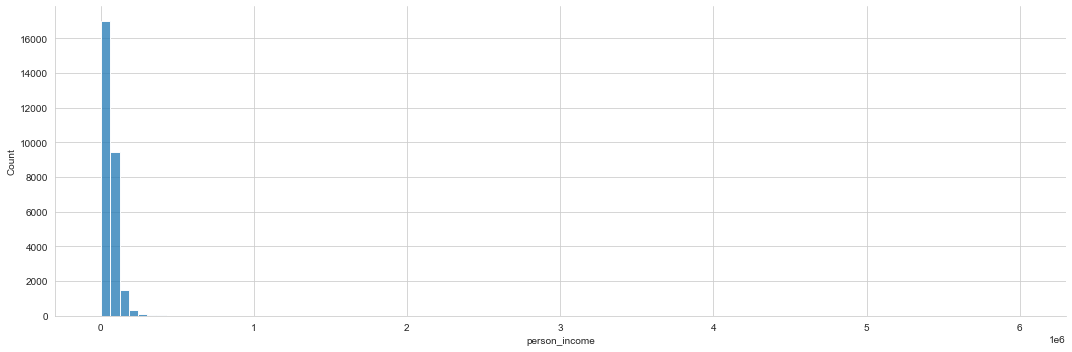

In [96]:
#Grafico de la variable person_income para ver su distribucion
sns.displot(df['person_income'], aspect=3, bins=100)
plt.show()

c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


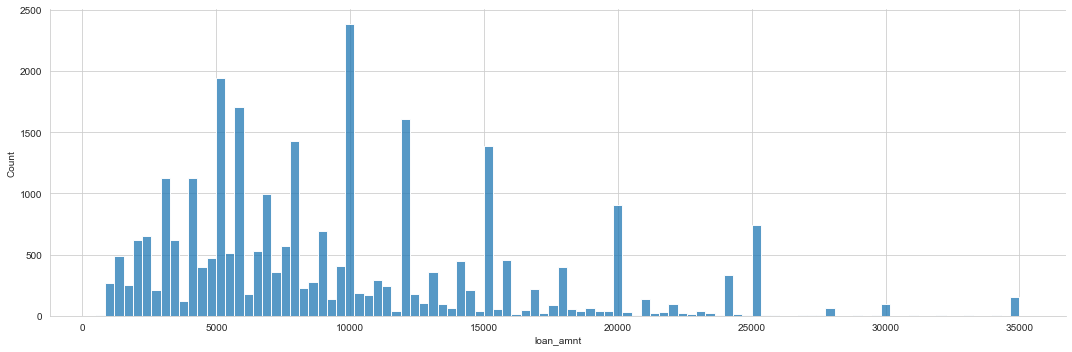

In [97]:
#Grafico de la variable loan_amnt para ver su distribucion
sns.displot(df['loan_amnt'], aspect=3, bins=100)
plt.show()

c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


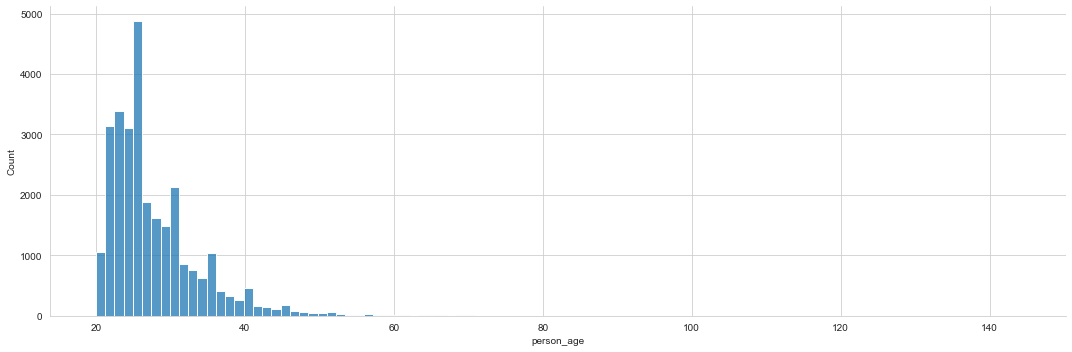

In [98]:
#Grafico de la variable person_age para ver su distribucion
sns.displot(df['person_age'], kde=False, bins=100, aspect=3)
plt.show()

c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


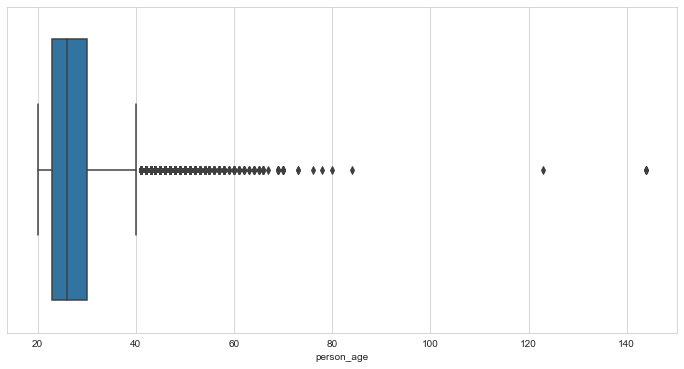

In [99]:
#Grafico de caja de la variable person_age para verificar outliers
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x=df['person_age'])
plt.show()

### En el grafico no se observan datos erroneos relacionados con la edad. En la tabla relacionada a los estadisticos descriptivos se observa un valor maximo de 144 para la variable graficada lo cual es un valor incorrecto y que debe ser corregido. Ademas en el boxplot se puede verificar la existencia de datos outliers.

In [100]:
#Verificar cuantas entradas de la variable person_age son mayores a 60
df[df['person_age'] > 60]['person_age'].count()

58

In [101]:
#eliminar las entradas de la variable person_age mayores a 60
df = df[df['person_age'] <= 60]

### El mismo proceso se realiza para la variable person_emp_length

c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


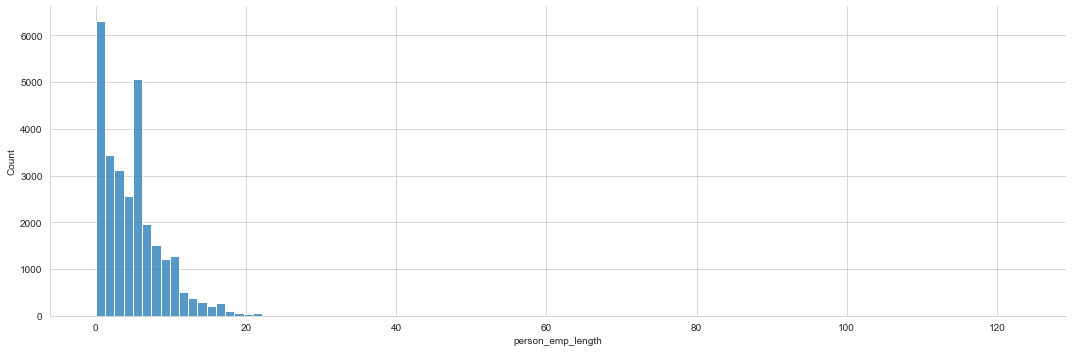

In [102]:
#Grafico de la variable person_emp_length para ver su distribucion
sns.displot(df['person_emp_length'], kde=False, bins=100, aspect=3)
plt.show()

c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


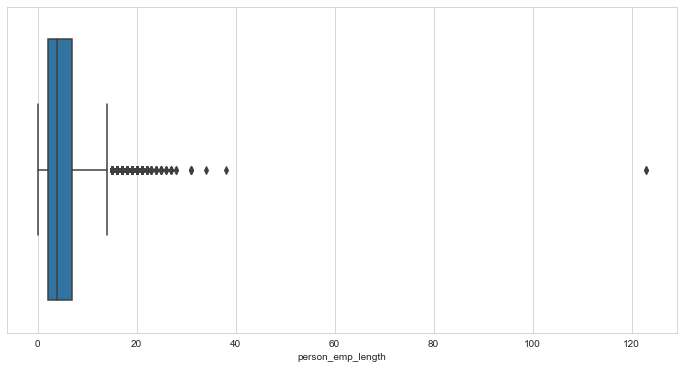

In [103]:
#Grafico de caja de la variable person_emp_lenght para verificar outliers
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x=df['person_emp_length'])
plt.show()

### En el grafico no se observan datos erroneos relacionados con los años que el usuario ha trabajado. En la tabla relacionada a los estadisticos descriptivos se observa un valor maximo de 123 años para la variable graficada lo cual es un valor incorrecto y que debe ser corregido. Ademas en el boxplot se puede verificar la existencia de datos outliers.

In [104]:
#Verificar cuantas entradas de la variable person_emp_length son mayores a 40
df[df['person_emp_length'] > 30]['person_emp_length'].count()

8

In [105]:
#eliminar las entradas de la variable person_emp_length mayores a 40
df = df[df['person_emp_length'] <= 30]

# Discretizacion de datos

### Se discretizaran las siguientes variables continuas (	person_age	person_income loan_amnt), agrupando sus valores en categorias especificas 

## Analisis de rangos

In [106]:
# analizar posibles rangos y cantidad de datos en cada rango para la columna person_age
def age_group(arr):
  for i in range(len(arr)-1):
    next_value = arr[i+1]
    values = df['person_age'].between(arr[i], next_value, inclusive='both').sum()
    print(f'cantidad de datos entre {arr[i]} y {arr[i+1]} = {values}')
age_group([20, 25, 30, float('inf')])

cantidad de datos entre 20 y 25 = 13389
cantidad de datos entre 25 y 30 = 10983
cantidad de datos entre 30 y inf = 7871


In [107]:
# analizar posibles rangos y cantidad de datos en cada rango para la columna person_income
valor_max = df['person_income'].max()
valor_min = df['person_income'].min()

def income_group(arr):
  for i in range(len(arr)-1):
    next_value = arr[i+1]
    values = df['person_income'].between(arr[i], next_value, inclusive='both').sum()
    print(f'cantidad de datos entre {arr[i]} y {arr[i+1]} = {values}')
    
income_group([valor_min, 30000, 50000, 70000, 100000, valor_max])

cantidad de datos entre 4000 y 30000 = 3721
cantidad de datos entre 30000 y 50000 = 9084
cantidad de datos entre 50000 y 70000 = 7715
cantidad de datos entre 70000 y 100000 = 6075
cantidad de datos entre 100000 y 2039784 = 4036


In [108]:
#Analizar posibles rangos y cantidad de datos en cada rango para la columna loan_amnt
valor_max = df['loan_amnt'].max()
valor_min = df['loan_amnt'].min()
def loan_group(arr):
  for i in range(len(arr)-1):
    next_value = arr[i+1]
    values = df['loan_amnt'].between(arr[i], next_value, inclusive='both').sum()
    print(f'cantidad de datos entre {arr[i]} y {arr[i+1]} = {values}')
loan_group([valor_min, 5000, 10000, 15000, valor_max])

cantidad de datos entre 500 y 5000 = 8125
cantidad de datos entre 5000 y 10000 = 12310
cantidad de datos entre 10000 y 15000 = 7708
cantidad de datos entre 15000 y 35000 = 5710


## Creacion de nuevas variables

In [109]:
#Creacion de la coluna age_group
df['age_group'] = pd.cut(df['person_age'], bins=[20, 25, 30, np.inf], labels=['20-25', '25-30', '30+'], include_lowest=True)

In [110]:
#Creacion de la coluna income_group
df['income_group'] = pd.cut(df['person_income'], bins=[0, 30000, 50000, 70000, 100000, float('inf')], labels=['low', 'low-middle', 'middle', 'middle-high', 'high'])

In [111]:
#Creacion de la coluna loan_group
df['loan_group'] = pd.cut(df['loan_amnt'], bins=[0, 5000, 10000, 15000, float('inf')], labels=['small', 'medium', 'large', 'very large'])

In [112]:
#Verificar que se crearon las columnas en el dataset principal
df[['age_group','loan_group','income_group']].head()

,age_group,loan_group,income_group
1,20-25,small,low
2,20-25,medium,low
3,20-25,very large,middle
4,20-25,very large,middle
5,20-25,small,low


## Transformacion de variables categoricas en continuas para observar las correlaciones existentes


### Creamos un encoder para codificar las variables que son categoricas

In [113]:
#Creacion del encoder para las variables categoricas
encoder = OrdinalEncoder()

In [114]:
#Seleccion de variables categoricas
cat_cols = df.select_dtypes(include=['object', 'category']).columns

In [115]:
#Copiar el dataset en un nuevo dataframe
df2 = df.copy()

In [116]:
#Aplicar el encoder a las variables categoricas
df2[cat_cols] = encoder.fit_transform(df2[cat_cols])

In [117]:
#Verificar que se aplico el encoder
df2.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_group
1,21,9600,2.0,5.0,1.0,1.0,1000,11.14,0,0.10,0.0,2,0.0,1.0,2.0
2,25,9600,0.0,1.0,3.0,2.0,5500,12.87,1,0.57,0.0,3,0.0,1.0,1.0
3,23,65500,3.0,4.0,3.0,2.0,35000,15.23,1,0.53,0.0,2,0.0,3.0,3.0
4,24,54400,3.0,8.0,3.0,2.0,35000,14.27,1,0.55,1.0,4,0.0,3.0,3.0
5,21,9900,2.0,2.0,5.0,0.0,2500,7.14,1,0.25,0.0,2,0.0,1.0,2.0


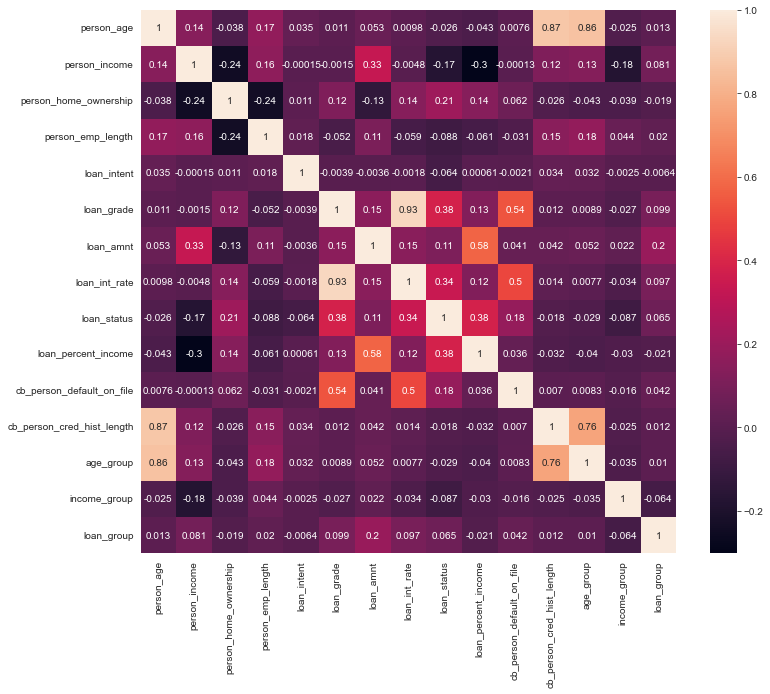

In [118]:
#Grafico de calor para ver la correlacion entre las variables numericas
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df2.corr(numeric_only=True), annot=True)
plt.show()

### Se puede ver como los valores con mayor correlación entre si son los de person_age con age_group y cb_person_cred_hist_length, con age_group tiene sentido ya que esta variable fue creada en base de los rangos de person_age para cred history length seria debido a que para tener una historia creditica larga se tiene que primero tener bastante edad y vice versa. Ya para la relación con menor correlación esta se encuentra en person_income con un valor de -0.00013 en cb_person_cred_hist_lenght.

In [119]:
#Crear el Scaler
scaler = MinMaxScaler()

In [120]:
#Ajustar el scaler al dataset
scaler.fit(df2)

c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


MinMaxScaler()

In [121]:
#Aplicar el scaler al dataset
dataset_scalado = scaler.transform(df2)

c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [122]:
#Crear dataset con el scaler aplicado
dataset_scalado = pd.DataFrame(dataset_scalado, columns=df2.columns)

In [123]:
#Exportar el scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## Pruebas de chi2

#### Ahora haremos pruebas de chi2 y anova para determinar la independencia de las variables y su relativa importancio para el modelo de predicción

#### Primero separaremos las variables categoricas de las númericas ya que chi2 sera para variables categoricas y ANOVA buscara representar las variables númericas

In [124]:
#Separacion de las columnas categoricas y numericas
var_cat=['person_home_ownership',
         'loan_intent','loan_grade',
         'cb_person_default_on_file',
         'cb_person_cred_hist_length',
         'age_group',
         'income_group',
         'person_emp_length',
         'loan_group']

var_cont=['person_income',
          'loan_amnt',
          'loan_int_rate',
          'loan_percent_income',
          'cb_person_cred_hist_length']

### Prueba CHI2

In [125]:
#Test Chi2 para variables categoricas
chi2_tabla = {'Variable':[],'Chi P-Value':[]}
for columna in var_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(df[columna],  df['loan_status']))
    chi2_tabla['Variable'].append(columna)
    chi2_tabla['Chi P-Value'].append(p)
chi2_tabla = pd.DataFrame(chi2_tabla)
chi2_tabla

,Variable,Chi P-Value
0,person_home_ownership,0.000000e+00
1,loan_intent,1.568916e-97
2,loan_grade,0.000000e+00
3,cb_person_default_on_file,8.025750e-206
4,cb_person_cred_hist_length,8.318654e-02
5,age_group,4.002673e-06
6,income_group,0.000000e+00
7,person_emp_length,6.882384e-54
8,loan_group,1.793522e-91


### Si la hipotesis se validara con valores P menores a 0.05 que seria un precisión de 95% entonces todas las variables cumplirian esta hipotesis

### ANOVA para variables continuas

In [126]:
#Tabla anova para variables continuas
F_statistic, p_values = f_classif(df[var_cont], df['loan_status'])
anovaTabla = pd.DataFrame(data = {'Feature':df[var_cont].columns.values,'F-Score':F_statistic,'P-Value':p_values})
anovaTabla['Feature']=var_cont
anovaTabla

c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


,Feature,F-Score,P-Value
0,person_income,851.509510,1.796653e-184
1,loan_amnt,370.236451,5.526480e-82
2,loan_int_rate,3709.578956,0.000000e+00
3,loan_percent_income,4784.921648,0.000000e+00
4,cb_person_cred_hist_length,9.612501,1.934461e-03


### De igual manera, buscando ver si los valores P son menores a 0.05 que seria una precisión de 95% entonces todas las variables pasarian.

# WoE

### Debido a que las pruebas CHI2 y ANOVA no nos dieron resultados conclusivos sobre la importancia de las variables sobre el modelo de predicción vamos a pasar a usar el Weight of Evidence el cual nos dara un Information Value, estas pruebas se basan en una comparación de Buenos y malos clientes y de eventos y no eventos para determinar sus valores, ya luego nos enfocaremos en aquellas variables que sean tengan un valor IV mayor a 0.02

In [127]:
# Copia del dataset original para aplicar el WOE y el IV
df_woe = df2.copy()
train_cols = df_woe.columns.drop('loan_status')

In [128]:
#Calculo del IV por columna
iv_score_dict = {}
for col in tqdm(train_cols):
    if col in var_cat:
        optb = optbinning.OptimalBinning(dtype='categorical')
        optb.fit(df_woe[col], df_woe['loan_status'])
    else:
        optb = optbinning.OptimalBinning(dtype='numerical')
        optb.fit(df_woe[col], df_woe['loan_status'])
    binning_table = optb.binning_table
    binning_table.build()
    iv_score_dict[col] = binning_table.iv

iv_score_df = pd.Series(iv_score_dict)
iv_score_df.sort_values(ascending=False, inplace=True)

100%|██████████| 14/14 [00:00<00:00, 17.35it/s]


In [129]:
iv_score_df.head(14)

loan_percent_income           0.958064
loan_grade                    0.891208
loan_int_rate                 0.799312
person_income                 0.515927
income_group                  0.385984
person_home_ownership         0.376643
cb_person_default_on_file     0.169196
loan_amnt                     0.098246
loan_intent                   0.097719
loan_group                    0.080659
person_emp_length             0.067229
person_age                    0.009902
cb_person_cred_hist_length    0.006711
age_group                     0.005151
dtype: float64

### Seleccionamos aquellas variables más relevantes

In [130]:
#Seleccion de las caracteristicas mas relevantes
top_features = iv_score_df[:11].index.values

### Separamos los datos en bins y graficamos sus events y non events para cada variable relevante

----------------------------------------------------------------------------------------------------
Variable: loan_percent_income


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.05)",3031,0.106594,2720,311,0.102606,0.885484,0.063554,0.007694
1,"[0.05, 0.07)",2349,0.082609,2078,271,0.115368,0.753932,0.037259,0.004550
2,"[0.07, 0.13)",7488,0.263337,6530,958,0.127938,0.636204,0.087832,0.010798
3,"[0.13, 0.16)",3162,0.111201,2702,460,0.145478,0.487411,0.022820,0.002825
4,"[0.16, 0.20)",3714,0.130614,3055,659,0.177437,0.250701,0.007628,0.000951
5,"[0.20, 0.25)",3298,0.115984,2659,639,0.193754,0.142691,0.002266,0.000283
6,"[0.25, 0.31)",2109,0.074169,1568,541,0.256520,-0.218973,0.003775,0.000471
7,"[0.31, 0.38)",1802,0.063373,560,1242,0.689234,-2.079652,0.366250,0.038984
8,"[0.38, inf)",1482,0.052119,392,1090,0.735493,-2.305781,0.366679,0.037791
9,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


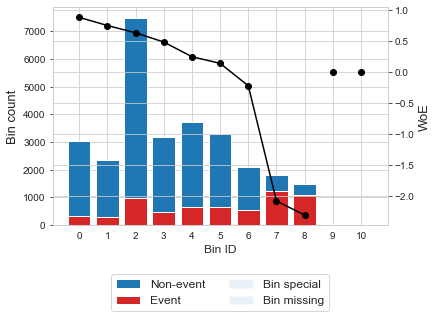

----------------------------------------------------------------------------------------------------
Variable: loan_grade


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[0.0],9326,0.327976,8429,897,0.096183,0.957267,0.223269,0.026890
1,[1.0],9073,0.319079,7629,1444,0.159154,0.38143,0.041447,0.005150
2,[2.0],5671,0.199437,4519,1152,0.203139,0.083681,0.001363,0.000170
3,"[3.0, 4.0, 5.0, 6.0]",4365,0.153508,1687,2678,0.613517,-1.745229,0.625128,0.069525
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,28435,1.000000,22264,6171,0.217021,,0.891208,0.101735


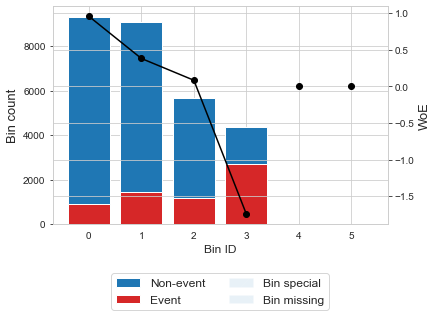

----------------------------------------------------------------------------------------------------
Variable: loan_int_rate


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 6.46)",1927,0.067769,1821,106,0.055008,1.560592,0.100836,0.011463
1,"[6.46, 7.46)",2411,0.084790,2193,218,0.090419,1.025421,0.064779,0.007760
2,"[7.46, 7.89)",2466,0.086724,2218,248,0.100568,0.907822,0.053956,0.006522
3,"[7.89, 9.64)",3092,0.108739,2699,393,0.127102,0.643717,0.037041,0.004552
4,"[9.64, 10.74)",3316,0.116617,2787,529,0.159530,0.378622,0.014939,0.001856
5,"[10.74, 11.51)",2768,0.097345,2316,452,0.163295,0.350805,0.010797,0.001343
6,"[11.51, 12.07)",1600,0.056269,1319,281,0.175625,0.263164,0.003607,0.000450
7,"[12.07, 12.76)",1963,0.069035,1593,370,0.188487,0.176761,0.002049,0.000256
8,"[12.76, 13.61)",2657,0.093441,2086,571,0.214904,0.012504,0.000015,0.000002
9,"[13.61, 14.37)",1623,0.057078,1174,449,0.276648,-0.321961,0.006448,0.000803


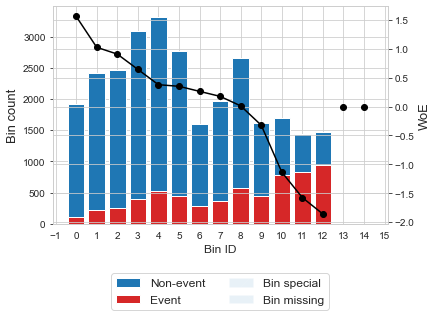

----------------------------------------------------------------------------------------------------
Variable: person_income


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 24228.00)",1681,0.059117,757,924,0.549673,-1.482459,0.171567,0.019675
1,"[24228.00, 34999.50)",3531,0.124178,2114,1417,0.401303,-0.88307,0.118924,0.014401
2,"[34999.50, 39937.50)",1991,0.070019,1452,539,0.270718,-0.292129,0.006464,0.000805
3,"[39937.50, 49994.00)",4205,0.147881,3300,905,0.215220,0.010633,0.000017,0.000002
4,"[49994.00, 59982.00)",3840,0.135045,3047,793,0.206510,0.062979,0.000526,0.000066
5,"[59982.00, 79942.50)",6008,0.211289,5080,928,0.154461,0.416925,0.032433,0.004025
6,"[79942.50, 89325.00)",1737,0.061087,1554,183,0.105354,0.855991,0.034363,0.004169
7,"[89325.00, inf)",5442,0.191384,4960,482,0.088570,1.048107,0.151634,0.018132
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


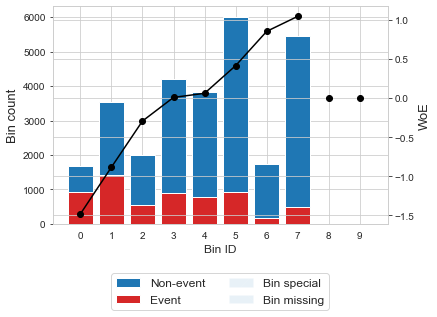

----------------------------------------------------------------------------------------------------
Variable: income_group


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[0.0],3703,0.130227,3340,363,0.098029,0.936213,0.085377,0.010299
1,[4.0],5608,0.197222,4914,694,0.123752,0.674261,0.072991,0.008955
2,[3.0],7043,0.247688,5773,1270,0.180321,0.231065,0.012361,0.001542
3,[2.0],8360,0.294004,6202,2158,0.258134,-0.22742,0.016177,0.002018
4,[1.0],3721,0.130860,2035,1686,0.453104,-1.094973,0.199077,0.023712
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,28435,1.000000,22264,6171,0.217021,,0.385984,0.046525


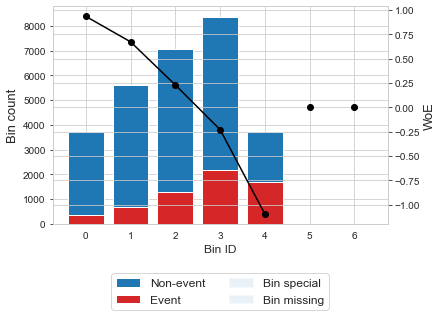

----------------------------------------------------------------------------------------------------
Variable: person_home_ownership


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[2.0],2173,0.076420,2028,145,0.066728,1.354961,0.091584,0.010646
1,[0.0],11708,0.411746,10229,1479,0.126324,0.650751,0.143017,0.017568
2,"[1.0, 3.0]",14554,0.511834,10007,4547,0.312423,-0.494293,0.142042,0.017577
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,28435,1.000000,22264,6171,0.217021,,0.376643,0.045790


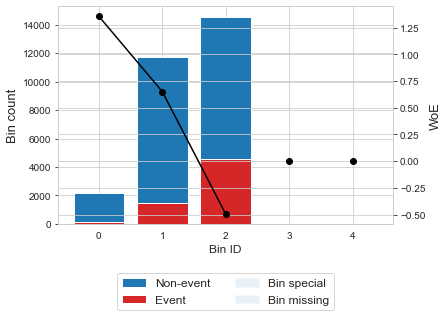

----------------------------------------------------------------------------------------------------
Variable: cb_person_default_on_file


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[0.0],23359,0.821488,19105,4254,0.182114,0.21898,0.036955,0.00461
1,[1.0],5076,0.178512,3159,1917,0.377660,-0.783616,0.132242,0.01612
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.00000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.00000
Totals,,28435,1.000000,22264,6171,0.217021,,0.169196,0.02073


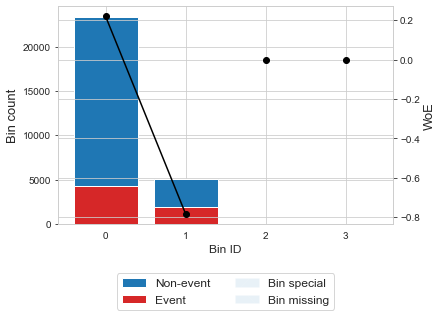

----------------------------------------------------------------------------------------------------
Variable: loan_amnt


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 3262.50)",3627,0.127554,2876,751,0.207058,0.05964,0.000446,0.000056
1,"[3262.50, 5437.50)",4763,0.167505,3855,908,0.190636,0.162772,0.004234,0.000529
2,"[5437.50, 6087.50)",2141,0.075295,1821,320,0.149463,0.45571,0.013642,0.001691
3,"[6087.50, 7487.50)",2077,0.073044,1741,336,0.161772,0.361994,0.008597,0.001069
4,"[7487.50, 8462.50)",2188,0.076947,1777,411,0.187843,0.180978,0.002391,0.000299
5,"[8462.50, 10587.50)",4070,0.143133,3272,798,0.196069,0.127938,0.002258,0.000282
6,"[10587.50, 12987.50)",2641,0.092878,2089,552,0.209012,0.047783,0.000209,0.000026
7,"[12987.50, 18087.50)",3901,0.137190,2864,1037,0.265829,-0.267223,0.010530,0.001312
8,"[18087.50, 22150.00)",1462,0.051416,981,481,0.329001,-0.570405,0.019327,0.002384
9,"[22150.00, inf)",1565,0.055038,988,577,0.368690,-0.74527,0.036612,0.004473


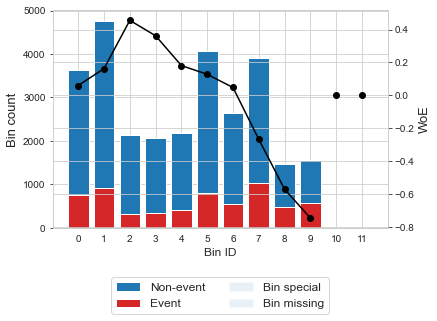

----------------------------------------------------------------------------------------------------
Variable: loan_intent


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[5.0],4963,0.174538,4235,728,0.146685,0.477727,0.034514,0.004274
1,[1.0],5664,0.199191,4700,964,0.170198,0.301116,0.016528,0.002058
2,[4.0],4835,0.170037,3877,958,0.198139,0.114859,0.002170,0.000271
3,[2.0],3184,0.111975,2365,819,0.257224,-0.222661,0.005899,0.000736
4,[3.0],5247,0.184526,3834,1413,0.269297,-0.284917,0.016174,0.002015
5,[0.0],4542,0.159733,3253,1289,0.283796,-0.357399,0.022434,0.002789
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,28435,1.000000,22264,6171,0.217021,,0.097719,0.012143


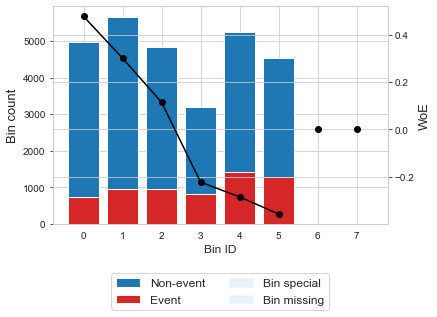

----------------------------------------------------------------------------------------------------
Variable: loan_group


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1.0],10544,0.370811,8660,1884,0.178680,0.242207,0.020265,0.002527
1,[2.0],8125,0.285739,6514,1611,0.198277,0.113988,0.003593,0.000449
2,[0.0],5390,0.189555,4143,1247,0.231354,-0.082431,0.001318,0.000165
3,[3.0],4376,0.153895,2947,1429,0.326554,-0.559297,0.055483,0.006846
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,28435,1.000000,22264,6171,0.217021,,0.080659,0.009987


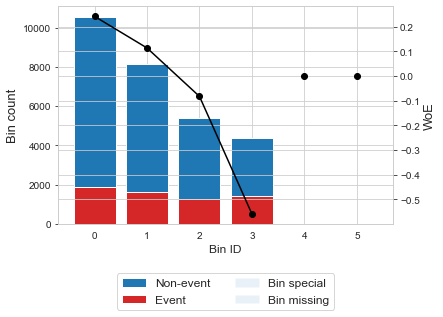

----------------------------------------------------------------------------------------------------
Variable: person_emp_length


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",3681,0.129453,2643,1038,0.281989,-0.348491,0.017248,0.002145
1,"[0.50, 1.50)",2624,0.092281,1890,734,0.279726,-0.337287,0.011486,0.001429
2,"[1.50, 2.50)",3444,0.121118,2557,887,0.257549,-0.224365,0.006481,0.000808
3,"[2.50, 4.50)",5668,0.199332,4494,1174,0.207128,0.059216,0.000687,0.000086
4,"[4.50, 6.50)",5075,0.178477,4114,961,0.189360,0.171067,0.004970,0.000621
5,"[6.50, 7.50)",1961,0.068964,1593,368,0.187659,0.182181,0.002171,0.000271
6,"[7.50, 11.50)",4031,0.141762,3323,708,0.175639,0.263069,0.009082,0.001132
7,"[11.50, inf)",1951,0.068613,1650,301,0.154280,0.41831,0.010598,0.001315
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


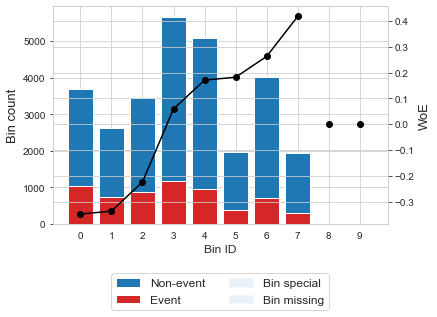

In [131]:
#Tabla de WOE e IV y grafico para cada BIN de cada variable seleccionada
for col in top_features:
    print("-"*100)
    print(f"Variable: {col}")
    if col in cat_cols:
        optb = optbinning.OptimalBinning(dtype='categorical')
        optb.fit(df_woe[col], df_woe['loan_status'])
    else:
        optb = optbinning.OptimalBinning(dtype='numerical')
        optb.fit(df_woe[col], df_woe['loan_status'])

    binning_table = optb.binning_table
    display(binning_table.build())
    binning_table.plot(metric="woe")

In [132]:
# Seleccion de variables con IV mayor a 0.02 y filtrar categoricas y de entrenamiento
selected_features = iv_score_df[iv_score_df > 0.02].index.values
cat_cols = [col for col in var_cat if col in selected_features]
train_cols = [col for col in df_woe.columns if col in selected_features]

### Eliminamos variables con posible alta correlación con la variable target

In [133]:
#Funcion auxiliar para eliminar las variables con alta correlacion 
def drop_feature_selection(row, col, corr, row_iv, col_iv):
    if row_iv >= col_iv:
        return col
    else:
        return row

In [134]:
#Comprobar la correlacion entre las variables difrentes de la variable objetivo
cor_matrix = df2[train_cols].corr(numeric_only=True).abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
corr_df = upper_tri.stack().reset_index()
corr_df.columns = ['row', 'col', 'corr']
corr_df = corr_df.drop_duplicates()
corr_df = corr_df.sort_values('corr', ascending=False)
corr_df = corr_df.query("corr >= 0.7")
corr_df['row_iv'] = corr_df['row'].map(iv_score_dict)
corr_df['col_iv'] = corr_df['col'].map(iv_score_dict)

corr_df['drop_feature'] = corr_df.apply(lambda x: drop_feature_selection(x['row'], x['col'], x['corr'], x['row_iv'], x['col_iv']), axis=1)

In [135]:
#Verificar las variables que se van a eliminar  
corr_df

,row,col,corr,row_iv,col_iv,drop_feature
35,loan_grade,loan_int_rate,0.933531,0.891208,0.799312,loan_int_rate


### Terminamos eliminando la variable loan_int_rate por su correlación a target

In [136]:
#Extraer variables a eliminar 
corr_drop_features = corr_df['drop_feature'].tolist()

In [137]:
#Variables de entrenamiento finales
train_cols = [col for col in train_cols if col not in corr_drop_features]

### Empezamos el entrenamiento del modelo con las variables apropiadas separando los datos en train y valid

In [138]:
#Split de datos en train y validacion
train_data, valid_data = model_selection.train_test_split(dataset_scalado, test_size=0.3, random_state=42, shuffle=True, stratify=df2['loan_status'])
train_data.shape, valid_data.shape

((19904, 15), (8531, 15))

## Scorecard

In [139]:
#Separacion de variables para entrenamiento y validacion
X_train = train_data[train_cols].copy()
y_train = train_data['loan_status'].copy()

X_valid = valid_data[train_cols].copy()
y_valid = valid_data['loan_status'].copy()

### Creamos un optbinning que va a separar los datos en bins parecidos a clusters

In [140]:
#Creacion del optbinning
binning_process = optbinning.BinningProcess(                             
    variable_names=train_cols,
    categorical_variables=cat_cols
)

In [141]:
#Definicion del modelo a entrenar
estimator = linear_model.LogisticRegression()

In [142]:
#Creación del scorecard
scorecard = optbinning.Scorecard(
    binning_process=binning_process,
    estimator=estimator, 
    scaling_method="min_max",
    scaling_method_params={"min": 0, "max": 1000},
)

In [143]:
scorecard.fit(X_train, y_train)

c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Scorecard(binning_process=BinningProcess(categorical_variables=['person_home_ownership',
                                                                'loan_intent',
                                                                'loan_grade',
                                                                'cb_person_default_on_file',
                                                                'income_group',
                                                                'person_emp_length',
                                                                'loan_group'],
                                         variable_names=['person_income',
                                                         'person_home_ownership',
                                                         'person_emp_length',
                                                         'loan_intent',
                                                         'loan_grade',
                                        

In [144]:
# scorecard table
scorecard_df = scorecard.table(style="detailed")

### Creamos la scorecard que nos muestra una puntuación tentativa de la persona según sus datos y basados en el modelo de predicción

In [145]:
scorecard_df.head()

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,person_income,0,"(-inf, 0.01)",1166,0.058581,540,626,0.536878,-1.430771,0.157752,1.819230e-02,-1.318203,-64.164130
1,person_income,1,"[0.01, 0.02)",2480,0.124598,1468,1012,0.408065,-0.911017,0.127597,1.542000e-02,-1.318203,-20.478804
2,person_income,2,"[0.02, 0.02)",1417,0.071192,1046,371,0.261821,-0.246463,0.004624,5.764816e-04,-1.318203,35.377026
3,person_income,3,"[0.02, 0.02)",2921,0.146754,2290,631,0.216022,0.006012,0.000005,6.618858e-07,-1.318203,56.597538
4,person_income,4,"[0.02, 0.03)",2715,0.136405,2146,569,0.209576,0.044491,0.000267,3.332321e-05,-1.318203,59.831722


In [146]:
scorecard_df.query("Variable == 'income_group'").sort_values("Points", ascending=False)

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
4,income_group,4,[0.25],2587,0.129974,1428,1159,0.448009,-1.074272,0.189775,0.022643,0.699163,103.982633
3,income_group,3,[0.5],5855,0.294162,4334,1521,0.259778,-0.235866,0.017449,0.002176,0.699163,66.607021
5,income_group,5,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.699163,56.092238
6,income_group,6,Missing,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.699163,56.092238
2,income_group,2,[0.75],4936,0.247990,4041,895,0.181321,0.224434,0.011699,0.001459,0.699163,46.087089
1,income_group,1,[1.0],3933,0.197598,3447,486,0.123570,0.676062,0.073480,0.009014,0.699163,25.953824
0,income_group,0,[0.0],2593,0.130275,2334,259,0.099884,0.915521,0.082228,0.009934,0.699163,15.278851


In [147]:
#Guardar el scorecard ajustado a los datos
joblib.dump(scorecard, 'scorecard.pkl')

['scorecard.pkl']

In [148]:
# Se debe de buscar las variables cuyo puntaje sea negativo, luego se ordena del menor al mayor
# 1. Elegir sólo las variables cuyo puntaje sea menor a 0
variablesRiesgosas = scorecard_df[(scorecard_df['Points'] < 0)][["Variable","Points"]]
# 2. Ordenar de menor a mayor
variablesRiesgosas.sort_values(by=['Points'])
# 3. Exponer estas variables en el reporte técnico

,Variable,Points
8,loan_percent_income,-98.843939
7,loan_percent_income,-86.518028
3,loan_grade,-83.140752
0,person_income,-64.164130
1,person_income,-20.478804


# Modelo

### Creamos el modelo de predicción en base a una regresión logistica

In [149]:
model = linear_model.LogisticRegression()

In [150]:
model.fit(X_train, y_train)

c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


LogisticRegression()

In [151]:
predict=model.predict(X_valid)

c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


### Sacamos las medidas de desempeño del modelo con accuracy, recall, la matriz de confusión y su ROC curve

In [152]:
tn, fp, fn, tp = metrics.confusion_matrix(y_valid,predict).ravel()

In [153]:
accuracy = (tp + tn) /(tp + tn + fn + fp)
accuracy

0.8469112647989685

In [154]:
precision = tp / (tp + fp)
precision

0.7335047129391602

In [155]:
recall = tn / (tn + fp)
recall

0.953443113772455

In [156]:
f1_score = (2*precision*recall)/(precision + recall)
f1_score

0.8291365108009815

In [157]:
score=model.score(X_valid, y_valid)

c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [158]:
#matriz de confusion
cm=metrics.confusion_matrix(y_valid, model.predict(X_valid))
print(cm)

[[6369  311]
 [ 995  856]]


c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


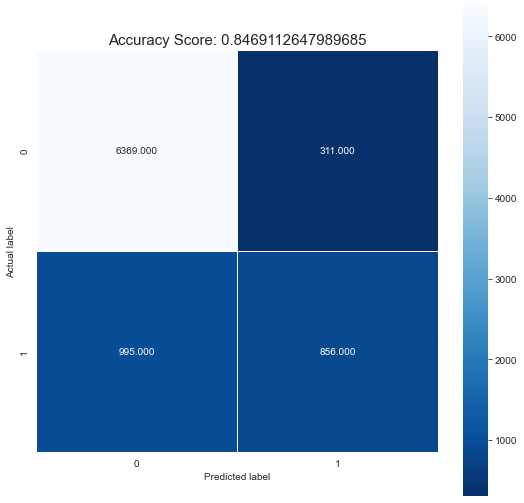

In [159]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [160]:
probas=model.predict_proba(X_train)

c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [161]:
# Generate RoC curve
fpr, tpr, thresholds = roc_curve(y_train, probas[:, 1])
roc_auc = auc(fpr, tpr)

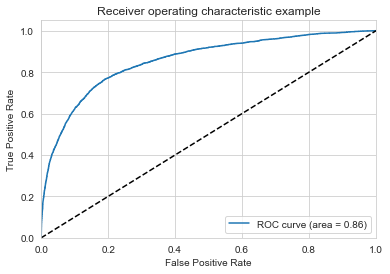

In [162]:

# Plot RoC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()